# Exploratory Data Analysis (EDA)

In [1]:
%%capture
%run 1.0-BasicUnderstandingOfData.ipynb

1. Importing libraries and plot customizations

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

order_transported = sorted(train_df["Transported"].value_counts().keys().to_list(), reverse=True)

def plot_style(ax):
    sns.despine(top=True, right=True, left=False, bottom=False)
    ax.spines["bottom"].set_color("gray")
    ax.spines["left"].set_color("gray")
    ax.tick_params(colors="gray")
    ax.xaxis.label.set_color("gray")
    ax.yaxis.label.set_color("gray")

2. Visualizing "Transported" feature

Text(0.5, 1.0, 'Transported Feature Distribution')

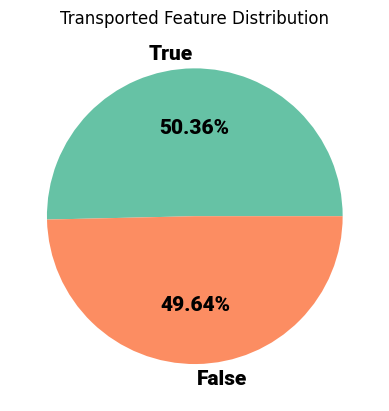

In [86]:
plt.pie(train_df["Transported"].value_counts(), labels = ["True", "False"], autopct = "%1.2f%%", textprops = {"fontsize": 15, "fontweight": "black", "fontname": "Roboto"}, colors = sns.color_palette("Set2"))
plt.title("Transported Feature Distribution")

### ❕ Observations
 We can observe that our Transported Feature is highly balanced, so we don't have to use techniques like under_sampling or over_sampling.

3. Visualizing "Age" feature

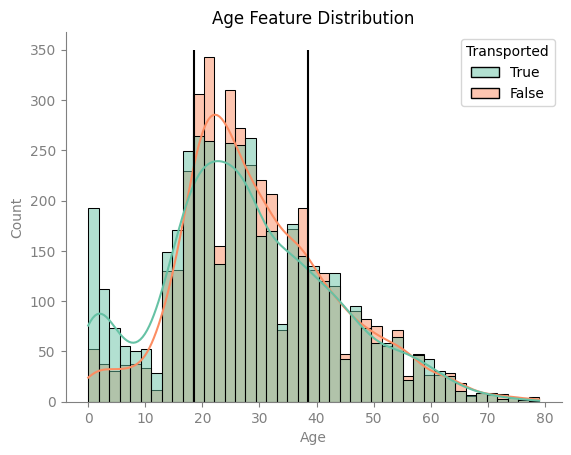

In [95]:
ax = sns.histplot(x = train_df["Age"], hue = "Transported",hue_order = order_transported , data = train_df, kde = True, palette = "Set2")
plt.vlines(18.5, ymin = 0, ymax = 350, color = "black")
plt.vlines(38.5, ymin = 0, ymax = 350, color = "black")
plt.title("Age Feature Distribution")
plot_style(ax)

### ❕ Observations
* Most of the passengers were between age 18-32.
* Age from 0-18 passengers are highly transported, espically for those who were new born.
* Age from 18-38 passengers are less transported. 
* Age above 38 seems to be equally transported.

4. Visualizing All Expenditure Features ("RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck")

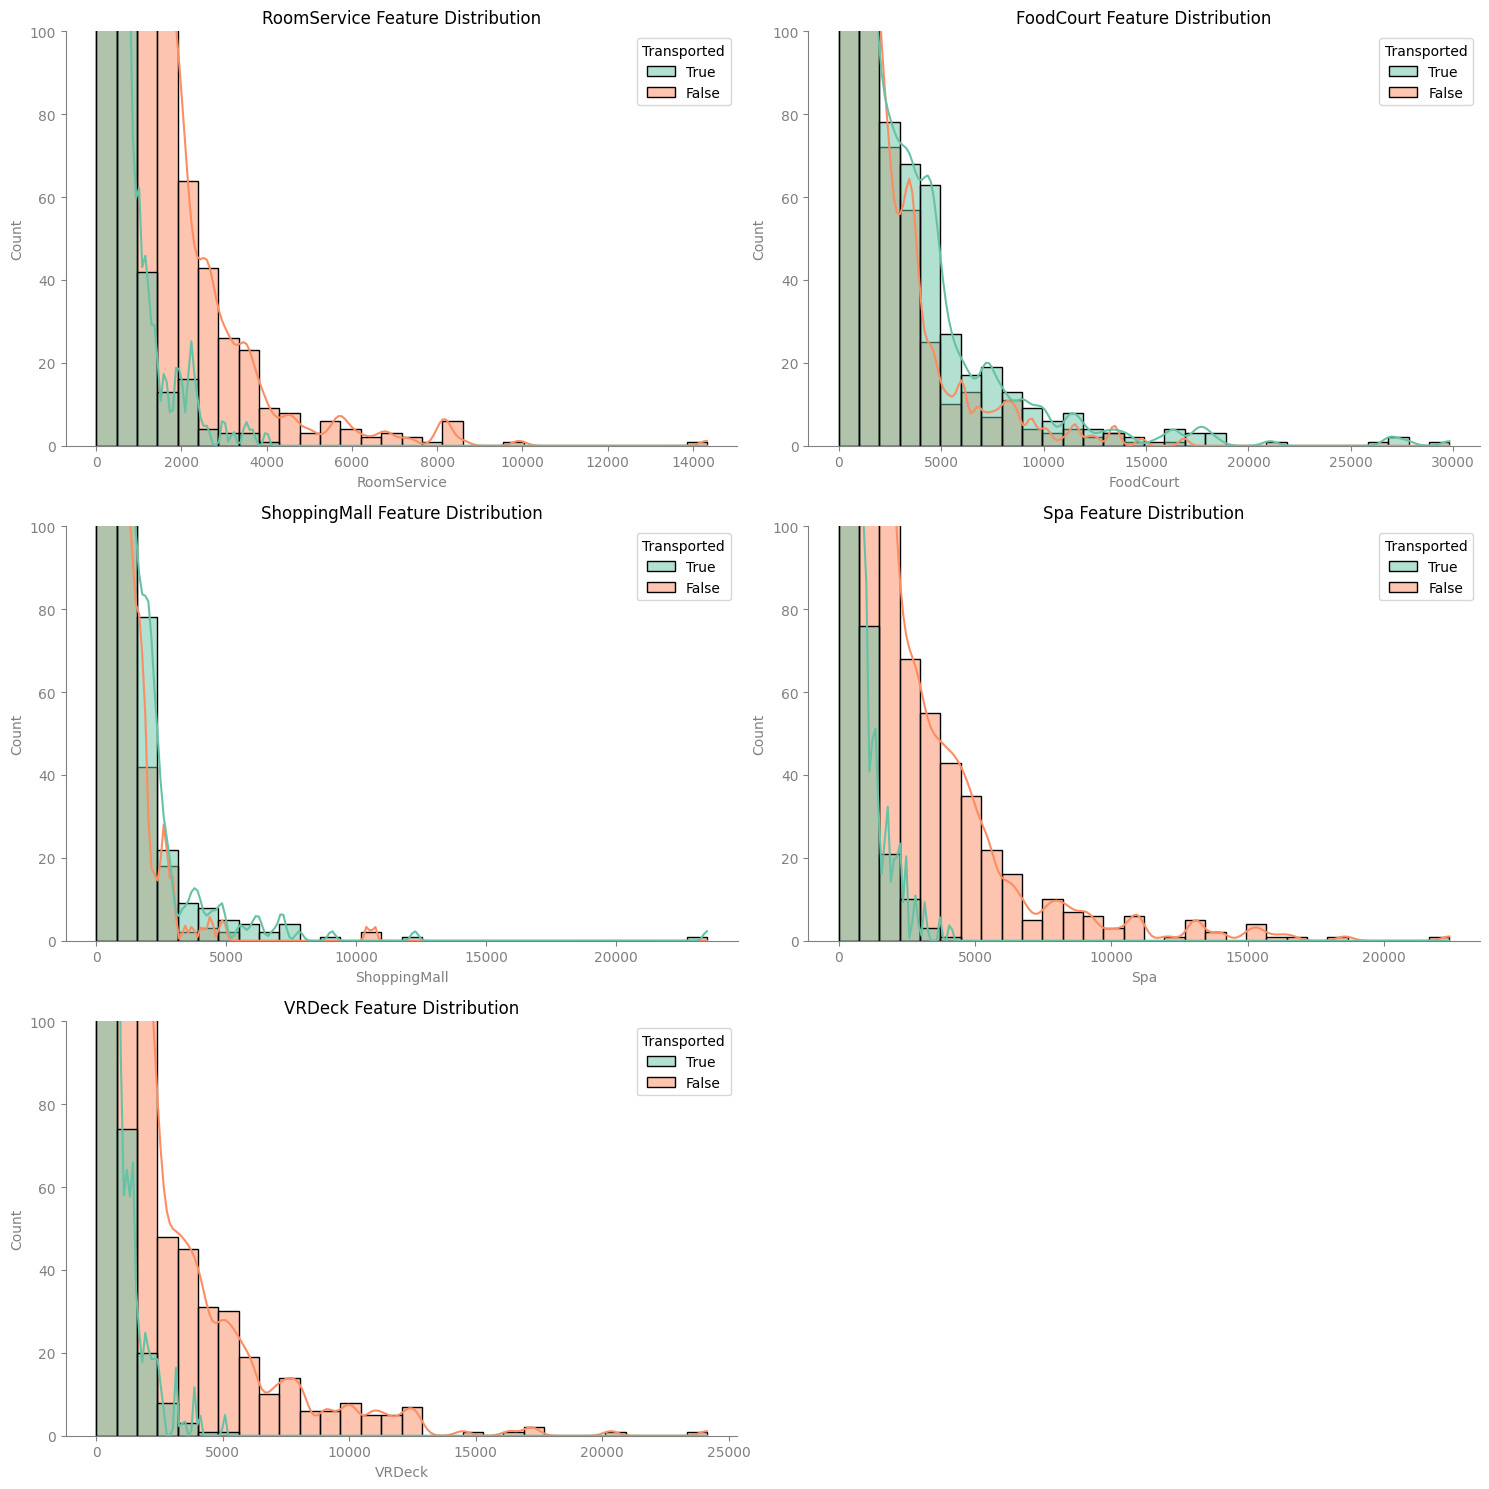

In [88]:
exp_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
plt.figure(figsize = (15,15))
for i, col in enumerate(exp_cols):
    ax = plt.subplot(3, 2, i + 1)
    sns.histplot(x = col, hue = "Transported", data = train_df, kde = True, bins = 30, palette = "Set2", hue_order = order_transported)
    plt.ylim(top = 100)
    plt.title(f"{col} Feature Distribution")
    plot_style(ax)
    plt.tight_layout()

### ❕ Observations
* We can observe that most of the passengers doesn't seems to expend any money.
* We can observe that RoomService,Spa & VRDeck seems to have similar distributions.
* We can also observe that FoodCourt & ShoppingMall are having kind of similar distributions.
* All the expenditure features distribution is Right-Skewed. So before Model Building we will transform these features to normal distribution using log-transformation
* Passengers having less expenses are more likely to be transported than passengers having high expenses. So we can create a new boolean feature No Spending indicating whether the passenger total expense is 0 or not.
* We can create a new feature Total Expenditure indicating the total expenses of all different expenditures done by the passengers. We can split Total Expenditure into different categories of expenditure like Low , Medium & High Expenses and create one more new feature Expenditure Category

5. Visualizing Categorical Features ("HomePlanet", "CryoSleep", "Destination", "VIP")

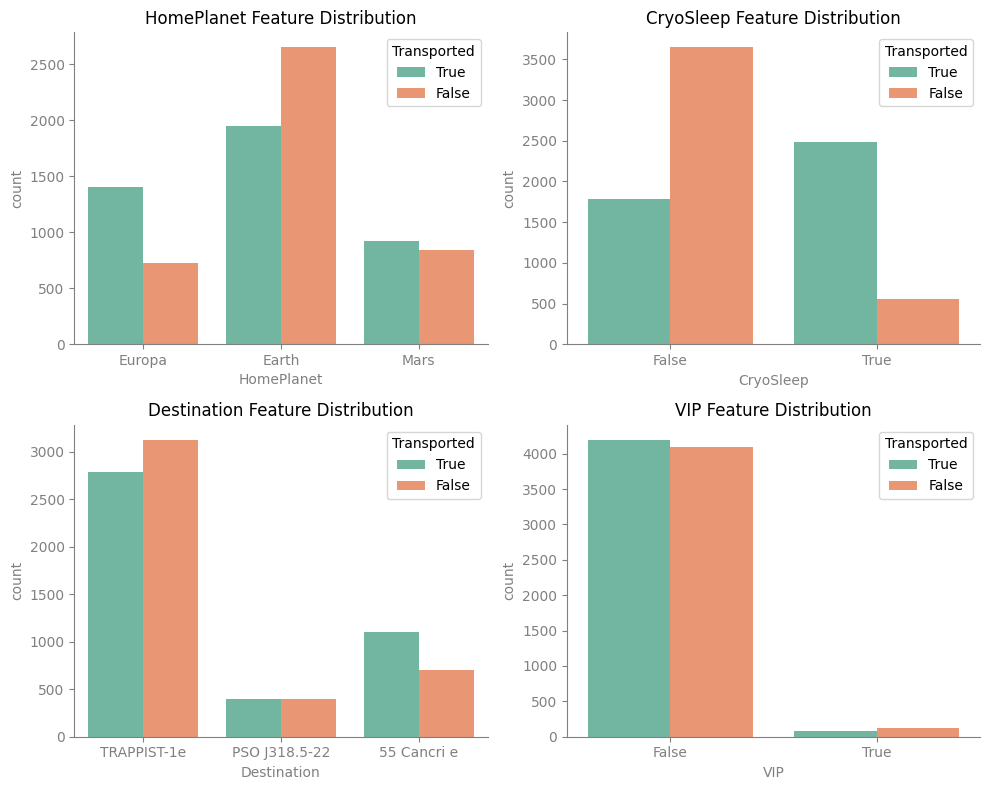

In [89]:
plt.figure(figsize = (10, 8))
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]
for i, col in enumerate(cat_cols):
    ax = plt.subplot(2,2,i + 1)
    sns.countplot(x=col, hue="Transported", data=train_df, palette="Set2", hue_order=order_transported)
    plt.title(f"{col} Feature Distribution")
    plot_style(ax)
    plt.tight_layout()
    

### ❕ Observations
* In HomePlanet feature we can observe that most of passenger are from Earth but passenger from Earth are comparatively less transported, passenger from Mars are Equally Transported, and passengers from Europa are Highly Transported.
* In CryoSleep feature we can observe that those passengers who were not cryosleeped were not transported, and those passengers who were cryosleeped were transported
* In Destination feature we can observe that most of the passengers are transported to Trappist-1e and were comparatively less transported, PSO J318.5-22 were equally transported, and 55 Cancri e were highly transported
* In VIP feature we can observe that one cateogry is dominating other category too much. So it doesn't seem to be usefull feature because it can lead to overfitting in our model. So it's better to drop VIP feature before Model building.